In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

%matplotlib inline

sns.set(style="ticks")

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


In [183]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [184]:
#Uploading the data files

In [185]:
Consumption = pd.read_excel('CreditConsumptionData.xlsx')
Behaviour= pd.read_excel('CustomerBehaviorData.xlsx')
Demographics= pd.read_excel('CustomerDemographics.xlsx')

In [186]:
#Exploratory data analysis

In [187]:
Consumption.shape

(20000, 2)

In [188]:
Behaviour.shape

(20000, 39)

In [189]:
Demographics.shape

(20000, 10)

In [190]:
Consumption.head()

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0


In [191]:
Consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       20000 non-null  int64  
 1   cc_cons  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 312.6 KB


In [192]:
Behaviour.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89


In [193]:
Behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

In [194]:
Demographics.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0


In [195]:
Demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [196]:
#Data preprocessing

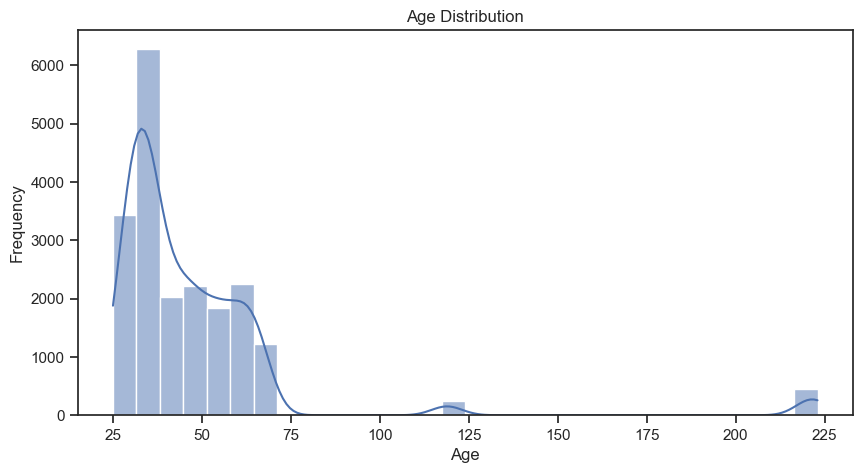

In [197]:
plt.figure(figsize=(10, 5))
sns.histplot(Demographics['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [198]:
# Calculate the mean age for ages 100 or less
mean_age = Demographics.loc[Demographics['age'] <= 100, 'age'].mean()

# Replace age values greater than 100 with the mean age
Demographics.loc[Demographics['age'] > 100, 'age'] = mean_age

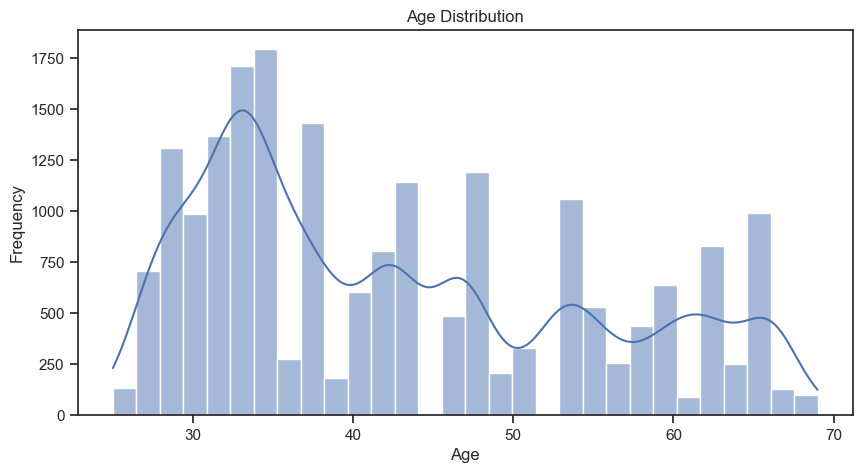

In [199]:
plt.figure(figsize=(10, 5))
sns.histplot(Demographics['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

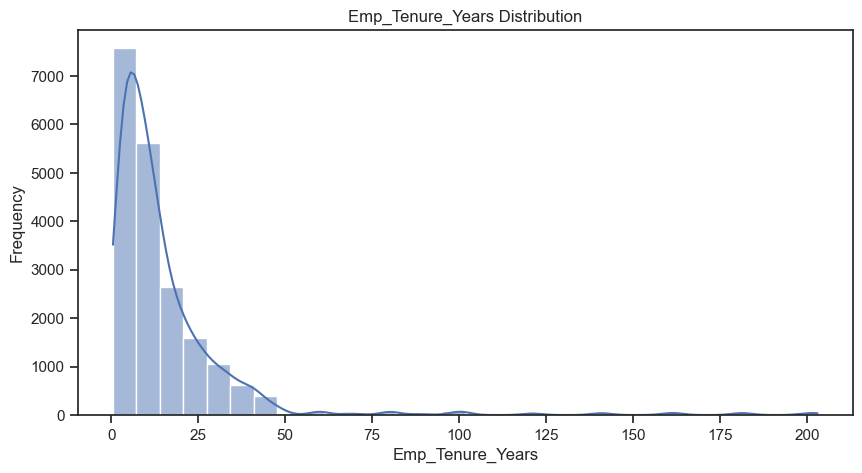

In [200]:
plt.figure(figsize=(10, 5))
sns.histplot(Demographics['Emp_Tenure_Years'], bins=30, kde=True)
plt.title('Emp_Tenure_Years Distribution')
plt.xlabel('Emp_Tenure_Years')
plt.ylabel('Frequency')
plt.show()

In [201]:
# Calculate the median emp tenure age for ages 100 or less
mean_tenure = Demographics.loc[Demographics['Emp_Tenure_Years'] <= 100, 'Emp_Tenure_Years'].mean()

# Replace emp tenure values greater than 100 with the mean emp tenure
Demographics.loc[Demographics['Emp_Tenure_Years'] > 100, 'Emp_Tenure_Years'] = mean_tenure

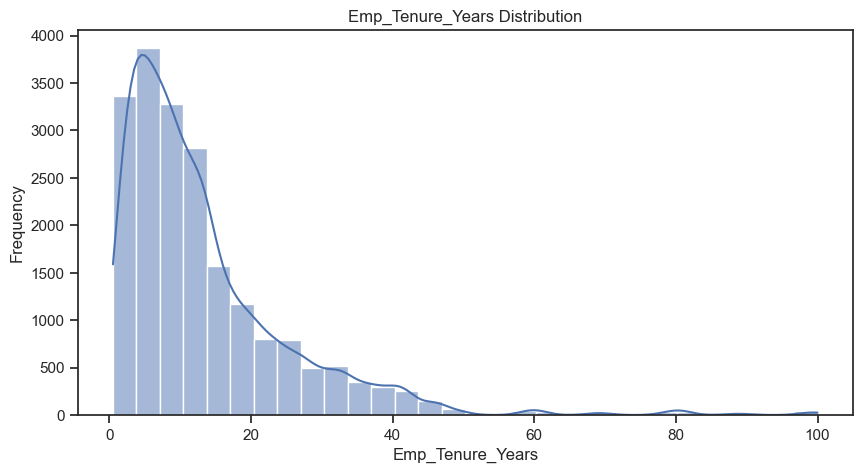

In [202]:
plt.figure(figsize=(10, 5))
sns.histplot(Demographics['Emp_Tenure_Years'], bins=30, kde=True)
plt.title('Emp_Tenure_Years Distribution')
plt.xlabel('Emp_Tenure_Years')
plt.ylabel('Frequency')
plt.show()

In [203]:
data = pd.merge(Demographics, Behaviour, on='ID')
data = pd.merge(data, Consumption, on='ID')

data.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63.0,MEDIUM,30.1,10,628.0,1,5.0,...,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36.0,MEDIUM,14.4,10,656.0,0,12.0,...,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28.0,MEDIUM,4.8,10,314.0,1,13.0,...,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32.0,MEDIUM,9.6,2,614.0,1,19.0,...,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32.0,HIGH,12.0,7,750.0,1,18.0,...,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN


In [204]:
data.describe()

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,20000.000000,20000.000000,20000.000000,20000.000000,19999.000000,20000.000000,19997.000000,20000.000000,20000.000000,1.999900e+04,...,20000.00000,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,20000.000000,2.000000e+04,1.999900e+04,15000.000000
mean,9999.500000,42.637245,13.404295,5.496050,598.959348,0.718000,11.044757,17856.990922,8130.453414,1.618836e+04,...,11.91900,40.974850,5.820799e+04,7.812280e+04,7.881693e+04,19.905450,44.529100,5.284985e+04,1.539887e+04,55157.729867
std,5773.647028,12.000725,12.291590,2.870452,220.105230,0.449985,5.480552,25158.878234,14572.188829,2.651068e+04,...,16.85576,40.561202,2.085914e+05,2.448983e+05,1.569872e+05,27.055323,35.080453,1.343175e+05,1.202541e+05,97670.972252
min,0.000000,25.000000,0.500000,1.000000,123.000000,0.000000,2.000000,253.000000,19.350000,1.570000e+02,...,0.00000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,4999.750000,33.000000,5.100000,3.000000,424.000000,0.000000,6.000000,4377.000000,1624.650000,3.635910e+03,...,2.00000,11.000000,2.020225e+04,2.576311e+04,2.492008e+04,4.000000,12.000000,1.896450e+04,1.545940e+03,6768.000000
50%,9999.500000,40.000000,9.900000,6.000000,623.000000,1.000000,11.000000,10214.642500,3964.750000,8.635230e+03,...,4.00000,23.000000,3.149650e+04,4.572505e+04,4.618300e+04,7.000000,37.000000,3.025000e+04,3.934660e+03,13364.000000
75%,14999.250000,53.000000,17.500000,8.000000,799.000000,1.000000,16.000000,21189.000000,9339.020000,1.865531e+04,...,11.00000,69.000000,5.642100e+04,8.529653e+04,8.602000e+04,21.000000,73.000000,5.344900e+04,9.376390e+03,20105.750000
max,19999.000000,69.000000,100.000000,10.000000,974.000000,1.000000,20.000000,441031.330000,229255.000000,1.117246e+06,...,71.00000,171.000000,1.000000e+07,2.642915e+07,6.611953e+06,117.000000,133.000000,5.200000e+06,7.447125e+06,408382.000000


In [205]:
print(data.isnull().sum())


ID                                 0
account_type                       1
gender                             1
age                                0
Income                             1
Emp_Tenure_Years                   0
Tenure_with_Bank                   0
region_code                        1
NetBanking_Flag                    0
Avg_days_between_transaction       3
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       1
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               1
vehicle_loan_closed                0
i

In [206]:
print(data['account_type'].value_counts())
print(data['gender'].value_counts())
print(data['loan_enq'].value_counts())
print(data['Income'].value_counts())


account_type
current    16925
saving      3074
Name: count, dtype: int64
gender
M    17287
F     2712
Name: count, dtype: int64
loan_enq
Y    19998
Name: count, dtype: int64
Income
MEDIUM    12774
LOW        5612
HIGH       1613
Name: count, dtype: int64


In [207]:
#Feature engineering- F=Deriving new variables


#Total credit and debit card spend in the last three months

data['sum_cc_spend'] = data[['cc_cons_apr', 'cc_cons_may', 'cc_cons_jun']].sum(axis=1)
data['sum_dc_spend'] = data[['dc_cons_apr', 'dc_cons_may', 'dc_cons_jun']].sum(axis=1)

#Average credit and debit card spend in the last three months

data['avg_cc_spend'] = data[['cc_cons_apr', 'cc_cons_may', 'cc_cons_jun']].mean(axis=1)

data['avg_dc_spend'] = data[['dc_cons_apr', 'dc_cons_may', 'dc_cons_jun']].mean(axis=1)

# Check the new features
data[['sum_cc_spend', 'sum_dc_spend', 'avg_cc_spend', 'avg_dc_spend']].head()


,sum_cc_spend,sum_dc_spend,avg_cc_spend,avg_dc_spend
0,24433.29,8292.58,8144.430000,2764.193333
1,35898.73,13916.00,11966.243333,4638.666667
2,33973.99,71489.30,11324.663333,23829.766667
3,22919.31,17534.18,7639.770000,5844.726667
4,38417.74,34300.86,12805.913333,11433.620000


In [208]:
data1= data.dropna()

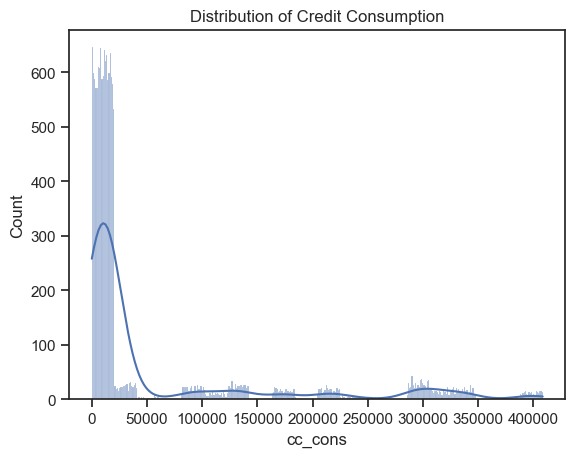

In [209]:
# Distribution of the target variable
sns.histplot(data1['cc_cons'], kde=True)
plt.title('Distribution of Credit Consumption')
plt.show()

Text(0.5, 1.0, 'Mean Credit Card Spend by Gender')

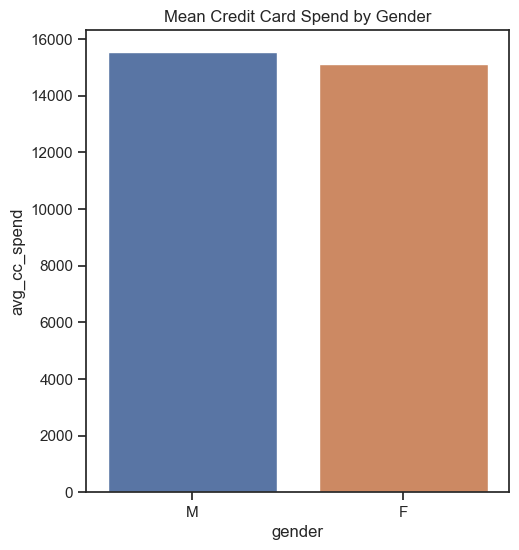

In [210]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='gender', y='avg_cc_spend', data=data1, ci=None)
plt.title('Mean Credit Card Spend by Gender')




Text(0.5, 1.0, 'Mean Credit Card Spend by Income group')

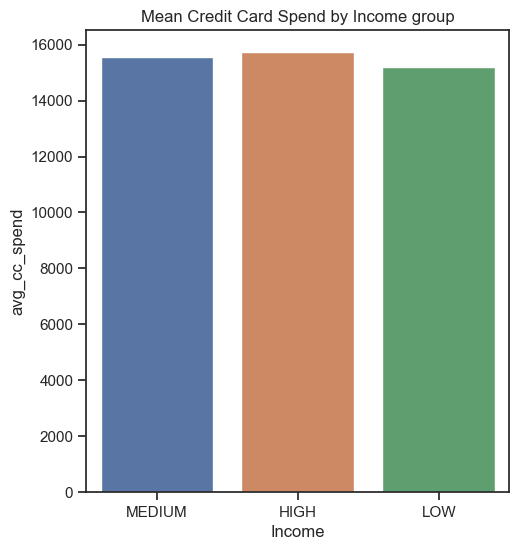

In [211]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Income', y='avg_cc_spend', data=data1, ci=None)
plt.title('Mean Credit Card Spend by Income group')




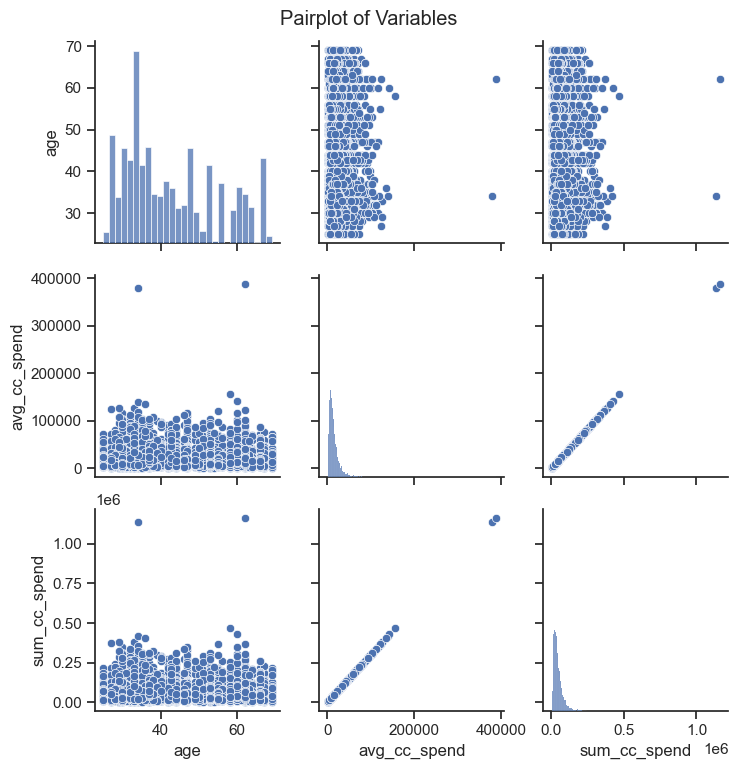

In [212]:
selected_features = ['age', 'avg_cc_spend', 'sum_cc_spend']

sns.pairplot(data1[selected_features])
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()

In [213]:
#Encoding of categorical variables

In [214]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encode categorical variables

# Label encoding for binary categories
label_encoder = LabelEncoder()

data['account_type']= label_encoder.fit_transform(data['account_type'])
data['gender'] = label_encoder.fit_transform(data['gender'])



In [215]:
# One-hot encoding for multi-category variables
data = pd.get_dummies(data, columns=['Income'], drop_first=True)

#Drop column with single category
data.drop(columns=['loan_enq'], inplace=True)
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)

# Check the encoded data
data.head()

,ID,account_type,gender,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,sum_cc_spend,sum_dc_spend,avg_cc_spend,avg_dc_spend,Income_LOW,Income_MEDIUM
0,19427,0,1,63.0,30.1,10,628.0,1,5.0,7998.48,...,96,46088.0,2646.72,NaN,24433.29,8292.58,8144.430000,2764.193333,0,1
1,16150,0,1,36.0,14.4,10,656.0,0,12.0,16479.64,...,12,17953.0,5469.79,NaN,35898.73,13916.00,11966.243333,4638.666667,0,1
2,11749,0,0,28.0,4.8,10,314.0,1,13.0,29272.03,...,42,41121.0,7207.85,NaN,33973.99,71489.30,11324.663333,23829.766667,0,1
3,11635,0,1,32.0,9.6,2,614.0,1,19.0,9662.31,...,10,32003.0,591.34,NaN,22919.31,17534.18,7639.770000,5844.726667,0,1
4,8908,0,1,32.0,12.0,7,750.0,1,18.0,13239.86,...,12,9626.0,2621.39,NaN,38417.74,34300.86,12805.913333,11433.620000,0,0


In [216]:
data.columns

Index(['ID', 'account_type', 'gender', 'age', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'emi_active', 'cc_cons', 'sum_cc_spend', 'sum_dc_spend', 'avg_cc_spend',
       'avg_d

In [217]:
# Data modeling

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
train_data = data.dropna()
test_data = data[data['cc_cons'].isnull()]



In [219]:
#Predicting and Validating model using RMPSE

In [220]:

X = train_data.drop(['ID', 'cc_cons'], axis=1)
y = train_data['cc_cons']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
rmspe = (mean_squared_error(y_test, y_pred) ** 0.5) / y_test.mean()
print(f'RMSPE: {rmspe}')


RMSPE: 1.8555832987068939


In [221]:
#Predicting for next three months where cc_cons values are missing

In [222]:
X_missing = test_data.drop(['ID', 'cc_cons'], axis=1)
X_missing.columns

Index(['account_type', 'gender', 'age', 'Emp_Tenure_Years', 'Tenure_with_Bank',
       'region_code', 'NetBanking_Flag', 'Avg_days_between_transaction',
       'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active',
       'sum_cc_spend', 'sum_dc_spend', 'avg_cc_spend', 'avg_dc_spend',
       'Income

In [224]:
#Fill missing values in X_missing

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
X_missing[['region_code']] = imputer.fit_transform(X_missing[['region_code']])

X_missing['Avg_days_between_transaction'].fillna(X_missing['Avg_days_between_transaction'].median(), inplace=True)

X_missing['cc_cons_may'].fillna(X_missing['cc_cons_may'].mean(), inplace=True)
X_missing['dc_cons_jun'].fillna(X_missing['dc_cons_jun'].mean(), inplace=True)




In [225]:

# Predict the missing values
predictions = model.predict(X_missing)

test_data['predicted_cc_cons'] = predictions

test_data[['ID', 'predicted_cc_cons']]



,ID,predicted_cc_cons
0,19427,33585.08
1,16150,46885.41
2,11749,74353.34
3,11635,37598.30
4,8908,43830.78
...,...,...
19995,1270,57598.38
19996,15992,46086.04
19997,7081,86696.84
19998,6821,60027.86


In [ ]:
#Treating missing values

most_frequent_gender = Demographics['gender'].mode()[0]
Demographics['gender'].fillna(most_frequent_gender, inplace=True)

Demographics['region_code'].fillna('Unknown', inplace=True)

most_frequent_income_type = Demographics['Income'].mode()[0]
Demographics['Income'].fillna(most_frequent_income_type, inplace=True)

most_frequent_income_type = Demographics['Income'].mode()[0]
Demographics['Income'].fillna(most_frequent_income_type, inplace=True)

